In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


from palmerpenguins import load_penguins

In [2]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
penguins = penguins.dropna()

In [4]:
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLUE_LIGHT = "#386cb0"
ORANGE = "#fdb462"
GREEN = "#7fc97f"

BLACK = "#282724"

GREY_DARK = "#747473"
RED_DARK = "#850e00"

#COLOR_SCALE = [BLUE_LIGHT, ORANGE, GREEN]

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]

In [5]:
species = sorted(penguins["species"].unique())
y_data = [penguins[penguins["species"] == specie]["bill_length_mm"].values for specie in species]

In [6]:
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

In [7]:
POSITIONS = [0, 1, 2]
HLINES = [40, 50, 60]

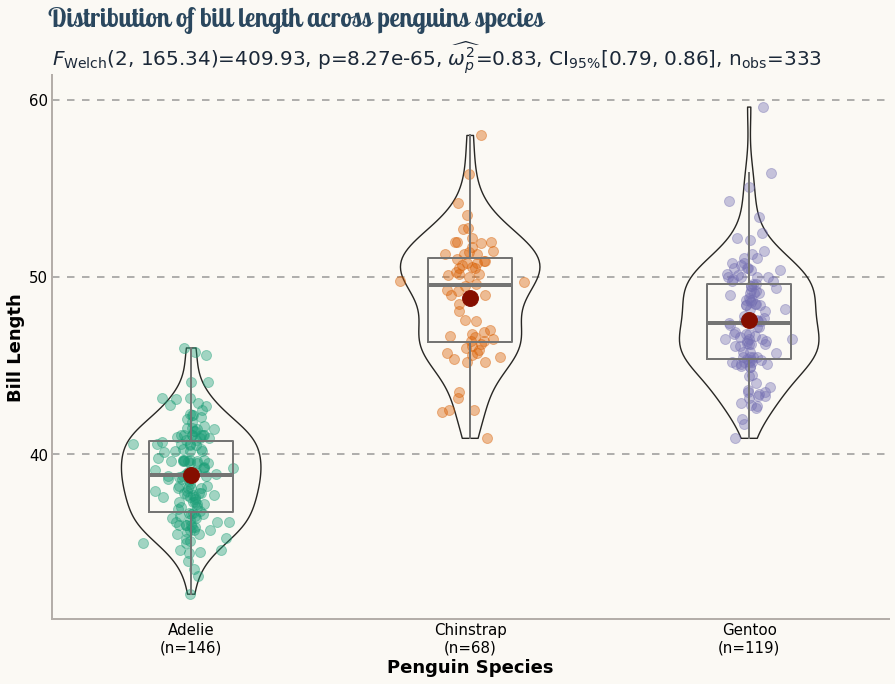

In [26]:
fig, ax = plt.subplots(figsize= (15, 10))

fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

for h in HLINES:
    plt.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

violins = plt.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.5,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    plt.scatter(x,  y, s = 100, color=color, alpha=0.4)

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)

boxprops = dict(linewidth= 2, color=GREY_DARK)

plt.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Show the outliers beyond the caps.
    showcaps = False,
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
);

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

plt.tick_params(length=0)

plt.yticks(HLINES, fontsize=15)
plt.ylabel("Bill Length", fontsize=18, fontweight="bold")

xlabels = [f"{specie}\n(n={y_data[i].size})" for i, specie in enumerate(species)]

plt.xticks(POSITIONS, xlabels, fontsize=15, ha="center", ma="center")
plt.xlabel("Penguin Species", fontsize=18, fontweight="bold")

for i in range(3):
    plt.scatter(i, y_data[i].mean(), s=250, color=RED_DARK, zorder=3)
    


stats = [
    r"$F_{\rm{Welch}}$(2, 165.34)=409.93",
    r"p=8.27e-65",
    r"$\widehat{\omega_p^2}$=0.83",
    r"CI$_{95\%}$[0.79, 0.86]",
    r"n$_{\rm{obs}}$=333"
]


# And the axis title acts as a subtitle.
ax.set_title(
    ", ".join(stats),
    loc="left",
    ha="left",
    fontsize=20,
    color=BLUE_DARK
)

plt.suptitle(
    "Distribution of bill length across penguins species",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=26,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
);

## Bonus track

color = "1" is actually a trick... it 

color = "#ffffff00" ---> sets transparency

On silverman bandwidth